# Advertising and Sales Analysis

Company XYZ has provided the sales and expenditure for three media platforms Tv, Radio and Social media. The Objectives of the analysis are as follows.
* Fit a model to predict sales
* Test hypothesis to find out any significant change in sales.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

In [2]:
df = pd.read_csv("advertising_and_sales_clean.csv")
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


### Exploratory

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [6]:
df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [8]:
#Coefficient of Variation
cv_tv = (df.tv.std() / df.tv.mean()) * 100
cv_radio = (df.radio.std() / df.radio.mean()) * 100
cv_social_media = (df.social_media.std() / df.social_media.mean()) * 100
print(cv_tv)
print(cv_radio)
print(cv_social_media)

48.286229236272995
53.21901154515335
66.53443639079796


The expenditure on social media has the highest variability from its mean.

In [4]:
df.corr()

,tv,radio,social_media,sales
tv,1.000000,0.869158,0.527687,0.999497
radio,0.869158,1.000000,0.606338,0.868638
social_media,0.527687,0.606338,1.000000,0.527446
sales,0.999497,0.868638,0.527446,1.000000


All the features have a high correlation with each other. The least correlation between **tv and social media**(0.527687). the highest between **radio and tv**(0.869158)

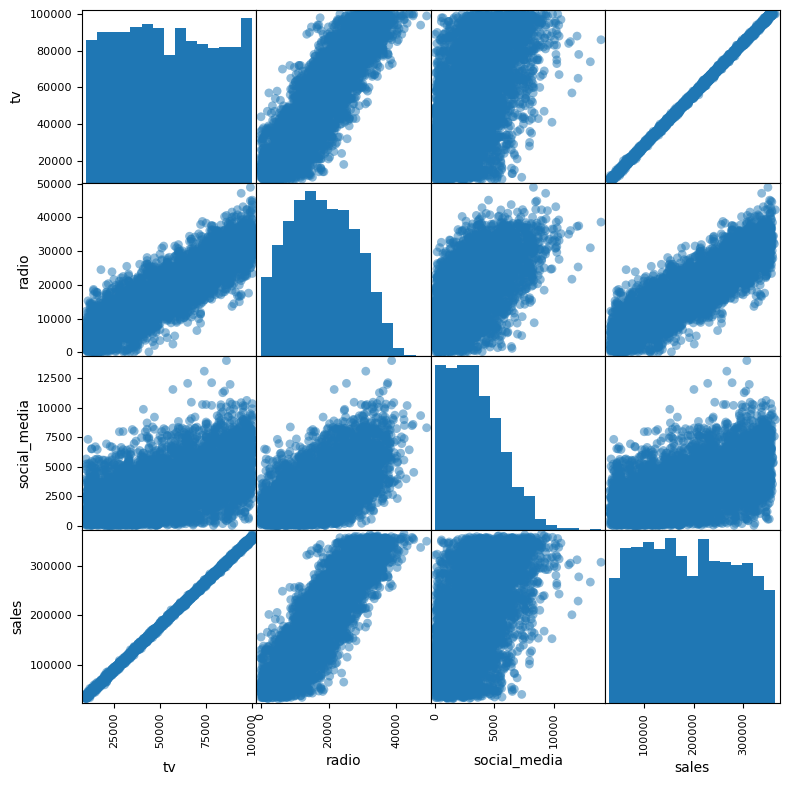

In [16]:
# cmap = cm.get_cmap('gnuplot')
%matplotlib inline
scatter = pd.plotting.scatter_matrix(df, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))
plt.show()

**Tv and sales** seem to have a uniform distribution, **Radio** is almost normal and **social media** is right-skewed. sales and tv seem to have a high relationship.

<AxesSubplot:>

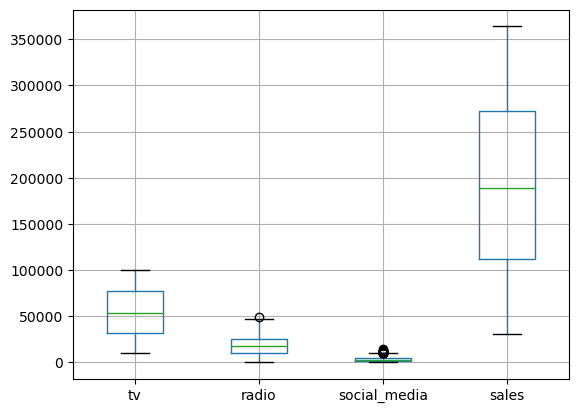

In [9]:
df.boxplot()

In [17]:
df["influencer"].value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: influencer, dtype: int64

### Data preprocessing

In [18]:
df["influencer"] = df["influencer"].astype("category")

In [20]:
# one hot encoding for influencer 
influencer_onehot = pd.get_dummies(df["influencer"],prefix="inf")

In [21]:
df = pd.concat([df, influencer_onehot], axis=1)
df.head()

,tv,radio,social_media,influencer,sales,inf_Macro,inf_Mega,inf_Micro,inf_Nano
0,16000.0,6566.23,2907.98,Mega,54732.76,0,1,0,0
1,13000.0,9237.76,2409.57,Mega,46677.90,0,1,0,0
2,41000.0,15886.45,2913.41,Mega,150177.83,0,1,0,0
3,83000.0,30020.03,6922.30,Mega,298246.34,0,1,0,0
4,15000.0,8437.41,1406.00,Micro,56594.18,0,0,1,0


In [22]:
df =df.drop("influencer", axis=1)
df.head()

,tv,radio,social_media,sales,inf_Macro,inf_Mega,inf_Micro,inf_Nano
0,16000.0,6566.23,2907.98,54732.76,0,1,0,0
1,13000.0,9237.76,2409.57,46677.90,0,1,0,0
2,41000.0,15886.45,2913.41,150177.83,0,1,0,0
3,83000.0,30020.03,6922.30,298246.34,0,1,0,0
4,15000.0,8437.41,1406.00,56594.18,0,0,1,0


In [24]:
X = df.loc[:, (df.columns != "sales")]
y = df["sales"]
print(X.columns)
y.head()

Index(['tv', 'radio', 'social_media', 'inf_Macro', 'inf_Mega', 'inf_Micro',
       'inf_Nano'],
      dtype='object')


0     54732.76
1     46677.90
2    150177.83
3    298246.34
4     56594.18
Name: sales, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.2)

In [28]:
#Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling 

In [29]:
# first model is with all features
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [30]:
# R_squared
reg_all.score(X_test, y_test)

0.9990495764315277

In [31]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

2890.2619171491892

In [33]:
# second model with only the tv feature
X_tv = df["tv"]

In [34]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, random_state=23, test_size=0.2)

In [43]:
#fit
reg_tv = LinearRegression()
reg_tv.fit(X_train.values.reshape(-1, 1), y_train.values)
y_pred = reg_tv.predict(X_test.values.reshape(-1, 1))

In [44]:
# R-squared
reg_tv.score(X_test.values.reshape(-1, 1), y_test)

0.9990494975327485

In [47]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

2890.3818812430654

The two trained models do not differ in predicting the target variable. It seems the Tv adverts have a strong relationship with sales. 

### Hypothses testing

To test that the mean sales of the product has increased from what is used to be 150000. A hypthesis testing will be carried out with level α = .05.
H0 : μ = 150000
against
Ha : μ > 150000.

In [51]:
from scipy.stats import ttest_1samp

# Define the null hypothesis value
null_hypothesis_value = 150000

# Perform one-sample t-test (right-tailed)
t_statistic, p_value = ttest_1samp(df["sales"], null_hypothesis_value, alternative='greater')

print("T-statistic:", t_statistic)
print("P-value:", p_value/2)  # Divide p-value by 2 for one-tailed test


T-statistic: 30.74265459622056
P-value: 2.5140082042187458e-189


The p-value is less than the significance level (α=0.05) chosen for the test , the null hypothesis H0 is rejected in favor of the alternative hypothesis H1. It suggests that there is sufficient evidence to support the claim that the true population mean is greater than 1500000. This shows that sales has gone up.